# Metadata

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
dir_name = '/content/drive/MyDrive/School Works/4-2/Intelligent Systems/'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(f"{dir_name}Crime_Data_from_2020_to_Present.csv")
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [ ]:
metadata_info = {
    "Number of Rows": df.shape[0],
    "Number of Columns": df.shape[1],
    "Column Names": df.columns.tolist(),
    "Missing Values Per Column": df.isnull().sum().to_dict(),
    "Data Types": df.dtypes.to_dict(),
    "Number of Duplicates": df.duplicated().sum(),
    "Memory Usage (MB)": df.memory_usage(deep=True).sum() / (1024 * 1024)
}

print("\nMetadata Information:")
for key, value in metadata_info.items():
    print(f"{key}: {value}")


Metadata Information:
Number of Rows: 1004876
Number of Columns: 28
Column Names: ['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON']
Missing Values Per Column: {'DR_NO': 0, 'Date Rptd': 0, 'DATE OCC': 0, 'TIME OCC': 0, 'AREA': 0, 'AREA NAME': 0, 'Rpt Dist No': 0, 'Part 1-2': 0, 'Crm Cd': 0, 'Crm Cd Desc': 0, 'Mocodes': 151597, 'Vict Age': 0, 'Vict Sex': 144609, 'Vict Descent': 144621, 'Premis Cd': 16, 'Premis Desc': 588, 'Weapon Used Cd': 677674, 'Weapon Desc': 677674, 'Status': 1, 'Status Desc': 0, 'Crm Cd 1': 11, 'Crm Cd 2': 935745, 'Crm Cd 3': 1002561, 'Crm Cd 4': 1004812, 'LOCATION': 0, 'Cross Street': 850655, 'LAT': 0, 'LON': 0}
Data Types: {'DR_NO': dtype('int64'), 'Date Rptd': dtype('O')

# Data Preprocessing

In [ ]:
# Display basic info
print("Initial Data Overview:")
df.info()

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004876 entries, 0 to 1004875
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004876 non-null  int64  
 1   Date Rptd       1004876 non-null  object 
 2   DATE OCC        1004876 non-null  object 
 3   TIME OCC        1004876 non-null  int64  
 4   AREA            1004876 non-null  int64  
 5   AREA NAME       1004876 non-null  object 
 6   Rpt Dist No     1004876 non-null  int64  
 7   Part 1-2        1004876 non-null  int64  
 8   Crm Cd          1004876 non-null  int64  
 9   Crm Cd Desc     1004876 non-null  object 
 10  Mocodes         853279 non-null   object 
 11  Vict Age        1004876 non-null  int64  
 12  Vict Sex        860267 non-null   object 
 13  Vict Descent    860255 non-null   object 
 14  Premis Cd       1004860 non-null  float64
 15  Premis Desc     1004288 non-null  object 
 16  Weapon Used C

In [ ]:
from datetime import datetime
import numpy as np

# Handling Missing Values
# Drop columns that have more than 50% missing values
drop_cols = ['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']
df.drop(columns=drop_cols, inplace=True)

# Fill missing values for categorical columns with mode
categorical_cols = ['Vict Sex', 'Vict Descent', 'Status']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Use mode instead of median for categorical codes
numerical_code_cols = ['Premis Cd', 'Crm Cd 1']
for col in numerical_code_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing values in 'Mocodes' with 'Unknown'
if 'Mocodes' in df.columns:
    df['Mocodes'].fillna('Unknown', inplace=True)

# Convert Date columns to datetime format
if 'Date Rptd' in df.columns:
    df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce').dt.date  # Keep only date

if 'DATE OCC' in df.columns:
    df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce').dt.date  # Keep only date

    # 🔻 Extract year, month, and day from DATE OCC
    df['OCC_YEAR'] = pd.to_datetime(df['DATE OCC']).dt.year
    df['OCC_MONTH'] = pd.to_datetime(df['DATE OCC']).dt.month
    df['OCC_DAY'] = pd.to_datetime(df['DATE OCC']).dt.day

# Convert TIME OCC to proper time format then to minutes since midnight
if 'TIME OCC' in df.columns:
    df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)  # Ensure 4-digit format
    df['TIME_OCC_CLEAN'] = df['TIME OCC'].apply(lambda x: datetime.strptime(x, "%H%M").time())  # Convert to time object
    df['TIME OCC'] = df['TIME_OCC_CLEAN'].apply(lambda t: t.strftime('%H:%M'))  # Keep the HH:MM string format

    # Create separate features
    df['HOUR_OCC'] = df['TIME_OCC_CLEAN'].apply(lambda t: t.hour)
    df['MINUTE_OCC'] = df['TIME_OCC_CLEAN'].apply(lambda t: t.minute)
    df['MINS_SINCE_MIDNIGHT'] = df['HOUR_OCC'] * 60 + df['MINUTE_OCC']

# Convert categorical variables to category dtype
df[categorical_cols] = df[categorical_cols].astype('category')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing latitude and longitude by setting them to None
if 'LAT' in df.columns and 'LON' in df.columns:
    df[['LAT', 'LON']] = df[['LAT', 'LON']].replace({0: np.nan})

# Display cleaned dataset info
print("\nCleaned Data Overview:")
df.info()


<ipython-input-5-984fe7444b3b>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-5-984fe7444b3b>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using


Cleaned Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004876 entries, 0 to 1004875
Data columns (total 29 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   DR_NO                1004876 non-null  int64   
 1   Date Rptd            1004876 non-null  object  
 2   DATE OCC             1004876 non-null  object  
 3   TIME OCC             1004876 non-null  object  
 4   AREA                 1004876 non-null  int64   
 5   AREA NAME            1004876 non-null  object  
 6   Rpt Dist No          1004876 non-null  int64   
 7   Part 1-2             1004876 non-null  int64   
 8   Crm Cd               1004876 non-null  int64   
 9   Crm Cd Desc          1004876 non-null  object  
 10  Mocodes              1004876 non-null  object  
 11  Vict Age             1004876 non-null  int64   
 12  Vict Sex             1004876 non-null  category
 13  Vict Descent         1004876 non-null  category
 14  Premis Cd 

In [ ]:
# Save the preprocessed dataset
df.to_csv('Preprocessed_Crime_Data.csv', index=False)
print("\nPreprocessing Complete! File saved as 'Preprocessed_Crime_Data.csv'.")


Preprocessing Complete! File saved as 'Preprocessed_Crime_Data.csv'.


In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,LOCATION,LAT,LON,OCC_YEAR,OCC_MONTH,OCC_DAY,TIME_OCC_CLEAN,HOUR_OCC,MINUTE_OCC,MINS_SINCE_MIDNIGHT
0,190326475,2020-03-01,2020-03-01,21:30,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,1900 S LONGWOOD AV,34.0375,-118.3506,2020,3,1,21:30:00,21,30,1290
1,200106753,2020-02-09,2020-02-08,18:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,1000 S FLOWER ST,34.0444,-118.2628,2020,2,8,18:00:00,18,0,1080
2,200320258,2020-11-11,2020-11-04,17:00,3,Southwest,356,1,480,BIKE - STOLEN,...,1400 W 37TH ST,34.0210,-118.3002,2020,11,4,17:00:00,17,0,1020
3,200907217,2023-05-10,2020-03-10,20:37,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,14000 RIVERSIDE DR,34.1576,-118.4387,2020,3,10,20:37:00,20,37,1237
4,200412582,2020-09-09,2020-09-09,06:30,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,200 E AVENUE 28,34.0820,-118.2130,2020,9,9,06:30:00,6,30,390


# Encoding Columns


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Load your cleaned dataset
df = pd.read_csv('Preprocessed_Crime_Data.csv')

# List of categorical feature columns to encode
feature_cols_to_encode = ['Vict Sex', 'Vict Descent','Premis Cd', 'Status']  # Add more if needed

# Dictionary to store the label encoders
feature_encoders = {}

# Apply Label Encoding to each categorical feature
for col in feature_cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Ensure all values are strings
    feature_encoders[col] = le

# Save the feature encoders for later use
with open('feature_label_encoders.pkl', 'wb') as f:
    pickle.dump(feature_encoders, f)

# Save the encoded feature dataset
df.to_csv('Encoded_Feature_Crime_Data.csv', index=False)

print("Feature encoding complete!")
print("Encoded dataset saved as 'Encoded_Feature_Crime_Data.csv'")
print("Encoders saved as 'feature_label_encoders.pkl'")

✅ Feature encoding complete!
📁 Encoded dataset saved as 'Encoded_Feature_Crime_Data.csv'
🔐 Encoders saved as 'feature_label_encoders.pkl'


In [ ]:
df = pd.read_csv('Encoded_Feature_Crime_Data.csv')
df.columns = df.columns.str.replace(' ', '_')
# Save to a new CSV file
df.to_csv('Encoded_Feature_Crime_Data.csv', index=False)

In [ ]:
df.head()

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Part_1-2,Crm_Cd,Crm_Cd_Desc,...,LOCATION,LAT,LON,OCC_YEAR,OCC_MONTH,OCC_DAY,TIME_OCC_CLEAN,HOUR_OCC,MINUTE_OCC,MINS_SINCE_MIDNIGHT
0,190326475,2020-03-01,2020-03-01,21:30,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,1900 S LONGWOOD AV,34.0375,-118.3506,2020,3,1,21:30:00,21,30,1290
1,200106753,2020-02-09,2020-02-08,18:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,1000 S FLOWER ST,34.0444,-118.2628,2020,2,8,18:00:00,18,0,1080
2,200320258,2020-11-11,2020-11-04,17:00,3,Southwest,356,1,480,BIKE - STOLEN,...,1400 W 37TH ST,34.0210,-118.3002,2020,11,4,17:00:00,17,0,1020
3,200907217,2023-05-10,2020-03-10,20:37,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,14000 RIVERSIDE DR,34.1576,-118.4387,2020,3,10,20:37:00,20,37,1237
4,200412582,2020-09-09,2020-09-09,06:30,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,200 E AVENUE 28,34.0820,-118.2130,2020,9,9,06:30:00,6,30,390


In [ ]:
import pandas as pd

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Feature Selection

## Feature Selection using Genetic Algorithm

In [ ]:
# Install required libraries
!pip install deap scikit-learn

# Import necessary libraries
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
import random
import gc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.0 MB/s eta 0:00:00


In [ ]:
# 🧠 Reduce memory usage
def reduce_memory_usage(df):
    for col in df.select_dtypes(include=['float64', 'float32']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    for col in df.select_dtypes(include=['int64', 'int32']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    return df

# Define features and target
X = df.drop(columns=['Crm Cd'])
y = df['Crm Cd']

# Keep only numeric columns and optimize memory
X_numeric = X.select_dtypes(include=[np.number])
X_numeric = reduce_memory_usage(X_numeric)  # 🧠

# 🧠 Use only the first 500,000 rows
X_numeric_sub = X_numeric.iloc[:500000]
y_sub = y.iloc[:500000]

# 🧠 Use Stratified K-Fold with fewer splits
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Create fitness function for GA
def eval_individual(individual):
    selected_indices = [i for i, bit in enumerate(individual) if bit == 1]
    if len(selected_indices) == 0:
        return 0.0,

    X_selected = X_numeric_sub.iloc[:, selected_indices]
    clf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

    try:
        scores = cross_val_score(clf, X_selected, y_sub, cv=cv, scoring='accuracy', n_jobs=1)  # 🧠 limit to 1 core
        return scores.mean(),
    except Exception as e:
        print(f"Error evaluating individual: {e}")
        return 0.0,

# GA setup
num_features = X_numeric.shape[1]

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", eval_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run Genetic Algorithm
population = toolbox.population(n=20)
NGEN = 10

for gen in range(NGEN):
    print(f"🧬 Generation {gen + 1}")
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    best = tools.selBest(population, k=1)[0]
    print(f"🔥 Gen {gen + 1} Best accuracy: {best.fitness.values[0]:.4f}")
    gc.collect()  # 🧠 free memory each generation

# Get best feature subset
selected_features = [feature for bit, feature in zip(best, X_numeric.columns) if bit == 1]
print("\n✅ Best Numeric Features Selected:")
print(selected_features)


🧬 Generation 1


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 1 Best accuracy: 0.8932
🧬 Generation 2


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 2 Best accuracy: 0.9058
🧬 Generation 3


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 3 Best accuracy: 0.9115
🧬 Generation 4


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 4 Best accuracy: 0.9115
🧬 Generation 5


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 5 Best accuracy: 0.9115
🧬 Generation 6


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 6 Best accuracy: 0.9115
🧬 Generation 7


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 7 Best accuracy: 0.9115
🧬 Generation 8


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 8 Best accuracy: 0.9115
🧬 Generation 9


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 9 Best accuracy: 0.9115
🧬 Generation 10


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 10 Best accuracy: 0.9115

✅ Best Numeric Features Selected:
['AREA', 'Part 1-2', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Crm Cd 1', 'HOUR_OCC', 'MINS_SINCE_MIDNIGHT']


## ✅ Best Numeric Features Selected:
['AREA', 'Rpt_Dist_No', 'Part_1-2', 'Vict_Age', 'Vict_Sex', 'Vict_Descent', 'Premis_Cd', 'Status', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'HOUR_OCC', 'MINUTE_OCC', 'MINS_SINCE_MIDNIGHT']

In [ ]:
print(df.dtypes)
print(df.head())

DR_NO                    int64
Date Rptd               object
DATE OCC                object
TIME OCC                object
AREA                     int64
AREA NAME               object
Rpt Dist No              int64
Part 1-2                 int64
Crm Cd                   int64
Crm Cd Desc             object
Mocodes                 object
Vict Age                 int64
Vict Sex                 int64
Vict Descent             int64
Premis Cd                int64
Premis Desc             object
Status                   int64
Status Desc             object
Crm Cd 1               float64
LOCATION                object
LAT                    float64
LON                    float64
OCC_YEAR                 int64
OCC_MONTH                int64
OCC_DAY                  int64
TIME_OCC_CLEAN          object
HOUR_OCC                 int64
MINUTE_OCC               int64
MINS_SINCE_MIDNIGHT      int64
dtype: object
       DR_NO   Date Rptd    DATE OCC TIME OCC  AREA   AREA NAME  Rpt Dist No  \
0  1903

### ['AREA', 'Rpt Dist No', 'Part 1-2', 'Vict Age', 'Vict Sex', 'Vict Descent','Premis Cd', 'Status', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'TIME_OCC_CLEAN', 'HOUR_OCC', 'MINUTE_OCC', 'MINS_SINCE_MIDNIGHT']


# Imbalanced Data Checking

In [ ]:
# Load the dataset
df = pd.read_csv('Encoded_Feature_Crime_Data.csv')

# Clean column names (remove spaces and standardize)
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Limit to the first 500,000 rows
df = df.iloc[:500_000]

# Count unique 'Crm_Cd' values and their frequency
crime_counts = df['Crm_Cd'].value_counts().sort_index()

# Display the result
print("Unique Crime Codes and Their Frequencies:")
print(crime_counts)

Unique Crime Codes and Their Frequencies:
Crm_Cd
110      901
113        6
121     2182
122      176
210    17362
220     2712
230    29154
231      715
235      349
236     7118
237      627
250      285
251      961
310    30423
320     2067
330    31595
331    16200
341    15456
343     1656
345       23
347        4
349        2
350     2258
351       62
352      622
353       11
354    28895
410      378
420    21028
421      595
432        1
433       96
434      177
435       13
436        7
437      512
438      156
439       77
440    26403
441      285
442     8502
443       55
444       10
446        6
450       63
451        7
452        2
470        3
471       12
473        5
474       14
475        5
480     4896
485        6
487       66
510    53906
520     1388
522      619
622      129
623     1465
624    39526
625     2405
626    25884
627     1901
647      465
648     1494
649     1728
651       37
652       19
653       65
654       48
660       74
661      318
66

<Axes: xlabel='Crm_Cd'>

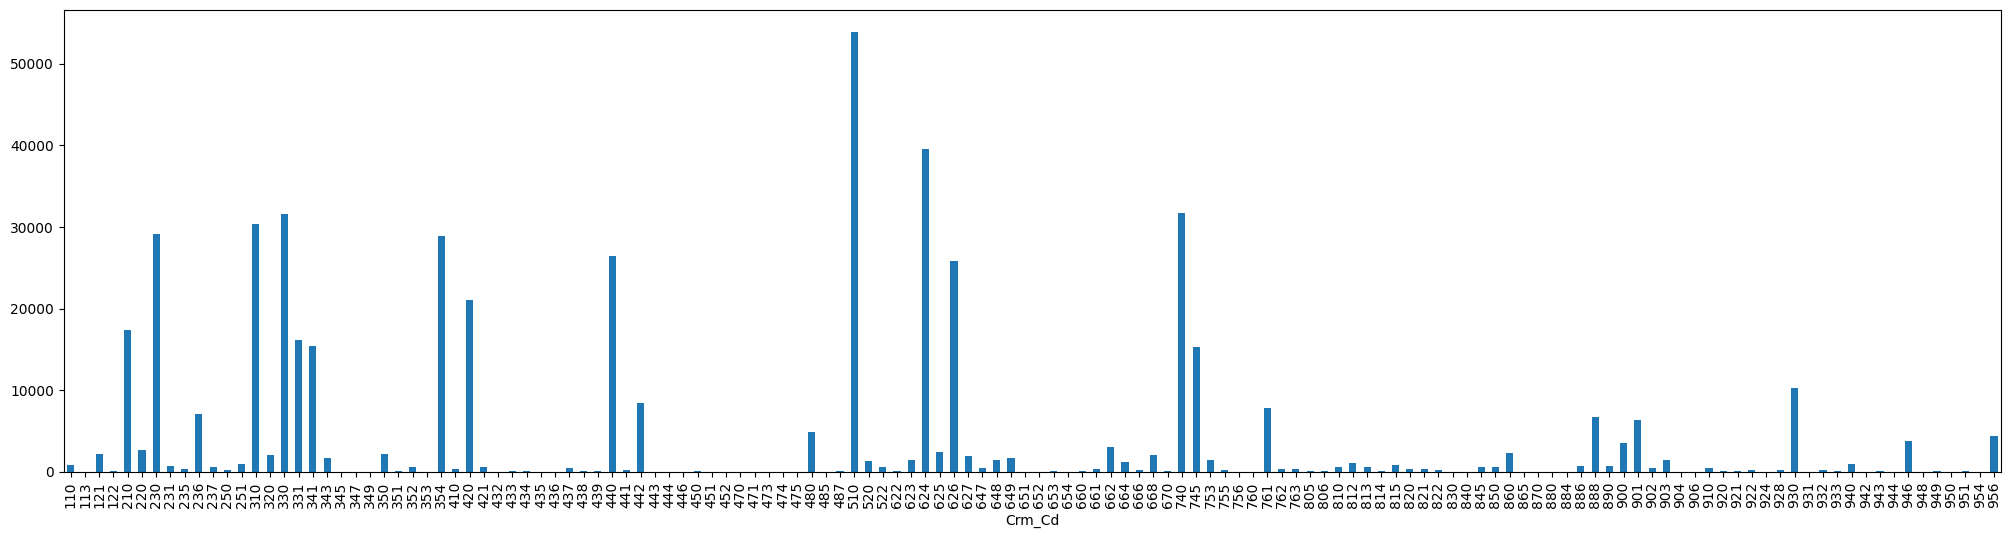

In [ ]:
df['Crm_Cd'].value_counts().sort_index().plot(kind='bar', figsize=(25,6))

# Model Training


## XGBoost

### SMOTE

In [ ]:
# 0. Install imbalanced-learn (needed for SMOTE)
!pip install -q imbalanced-learn

In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import time
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import joblib

In [ ]:
# 2. Load dataset
df = pd.read_csv('Encoded_Feature_Crime_Data.csv')

# 3. Limit to first 250,000 rows
df = df.iloc[:250_000]

# 4. Define selected features
selected_features = [
    'AREA', 'Rpt_Dist_No', 'Part_1-2', 'Vict_Age', 'Vict_Sex', 'Vict_Descent',
    'Premis_Cd', 'Status', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY',
    'HOUR_OCC', 'MINUTE_OCC', 'MINS_SINCE_MIDNIGHT'
]

# 5. Drop rows with missing values
df = df.dropna(subset=selected_features + ['Crm_Cd'])

# 6. Define features and target
X = df[selected_features]
y = df['Crm_Cd']

# 7. Label encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 8. Remove classes with fewer than 4 samples (for SMOTE)
original_counts = Counter(y_encoded)
valid_classes = [cls for cls, count in original_counts.items() if count >= 4]
mask = np.isin(y_encoded, valid_classes)
X_filtered = X[mask]
y_filtered_raw = y[mask]  # Go back to original labels (before encoding)

# ⚠️ Re-label encode after filtering
le_filtered = LabelEncoder()
y_filtered = le_filtered.fit_transform(y_filtered_raw)

# 9. Apply SMOTE
sm = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = sm.fit_resample(X_filtered, y_filtered)
# 10. Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

# 11. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# 12. Define XGBoost model with early stopping
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y_resampled)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=500,
    learning_rate=0.05,
    random_state=42
)

# 13. Train the model
start_time = time.time()
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False

)
print(f"Training time: {time.time() - start_time:.2f} seconds")

Class distribution after SMOTE: Counter({np.int64(49): 26383, np.int64(15): 26383, np.int64(46): 26383, np.int64(18): 26383, np.int64(59): 26383, np.int64(13): 26383, np.int64(81): 26383, np.int64(82): 26383, np.int64(116): 26383, np.int64(73): 26383, np.int64(56): 26383, np.int64(4): 26383, np.int64(17): 26383, np.int64(6): 26383, np.int64(24): 26383, np.int64(54): 26383, np.int64(37): 26383, np.int64(67): 26383, np.int64(100): 26383, np.int64(101): 26383, np.int64(35): 26383, np.int64(72): 26383, np.int64(2): 26383, np.int64(16): 26383, np.int64(98): 26383, np.int64(50): 26383, np.int64(32): 26383, np.int64(70): 26383, np.int64(25): 26383, np.int64(121): 26383, np.int64(109): 26383, np.int64(91): 26383, np.int64(66): 26383, np.int64(26): 26383, np.int64(84): 26383, np.int64(78): 26383, np.int64(14): 26383, np.int64(74): 26383, np.int64(53): 26383, np.int64(51): 26383, np.int64(88): 26383, np.int64(92): 26383, np.int64(41): 26383, np.int64(57): 26383, np.int64(55): 26383, np.int64(97)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training time: 20714.54 seconds


In [ ]:
# Save model to file
xgb_model.save_model("xgb_crime_model.json")

# Optional: Save LabelEncoder too
import joblib
joblib.dump(le_filtered, "label_encoder.pkl")

['label_encoder.pkl']

## Metrics

In [ ]:
# 14. Make predictions
start_infer = time.time()
y_pred = xgb_model.predict(X_test)
print(f"Inference time: {time.time() - start_infer:.2f} seconds")

Inference time: 881.01 seconds


In [ ]:
# 15. Evaluate performance
from sklearn.metrics import precision_score, recall_score

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Macro and Weighted Scores
print("Macro Precision:", precision_score(y_test, y_pred, average='macro'))
print("Macro Recall:   ", recall_score(y_test, y_pred, average='macro'))
print("Macro F1-score: ", f1_score(y_test, y_pred, average='macro'))

print("Weighted Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Weighted Recall:   ", recall_score(y_test, y_pred, average='weighted'))
print("Weighted F1-score: ", f1_score(y_test, y_pred, average='weighted'))

# Full per-class report
print("\nDetailed Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7897012175609635
Macro Precision: 0.7719127121329531
Macro Recall:    0.7894373954051596
Macro F1-score:  0.7735907779735154
Weighted Precision: 0.7721840334816426
Weighted Recall:    0.7897012175609635
Weighted F1-score:  0.7738465179054175

Detailed Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76      5285
           1       1.00      1.00      1.00      5279
           2       0.59      0.65      0.62      5318
           3       0.83      0.96      0.89      5240
           4       0.43      0.15      0.22      5482
           5       0.53      0.38      0.44      5280
           6       0.39      0.28      0.32      5231
           7       0.93      0.97      0.95      5178
           8       0.92      0.99      0.96      5319
           9       0.49      0.63      0.55      5203
          10       0.89      0.92      0.90      5333
          11       0.84      0.98      0.91      5433
         

#### Bootstrap Confidence Interval:

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

boot_f1s = []

# Ensure y_test and y_pred are NumPy arrays
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

for _ in range(100):
    indices = np.random.choice(len(y_test_array), len(y_test_array), replace=True)
    y_sample = y_test_array[indices]
    y_pred_sample = y_pred_array[indices]

    score = f1_score(y_sample, y_pred_sample, average='weighted')
    boot_f1s.append(score)

# 95% confidence interval
ci_low = np.percentile(boot_f1s, 2.5)
ci_high = np.percentile(boot_f1s, 97.5)

print(f"95% CI for Weighted F1: {ci_low:.4f} - {ci_high:.4f}")


95% CI for Weighted F1: 0.7728 - 0.7748


#### ROC Curve

In [ ]:
# Predict class probabilities
y_probs = xgb_model.predict_proba(X_test)  # shape: [n_samples, n_classes]


In [ ]:
from collections import Counter
import numpy as np

# Use y_train to get top 5 most frequent classes
top_classes = [cls for cls, _ in Counter(y_train).most_common(5)]
print("Top 5 classes:", top_classes)

Top 5 classes: [np.int64(41), np.int64(58), np.int64(121), np.int64(83), np.int64(81)]


In [ ]:
from sklearn.preprocessing import label_binarize

# Get number of classes
num_classes = len(np.unique(y_train))

# Binarize y_test for ROC
y_test_bin = label_binarize(y_test, classes=np.arange(num_classes))  # shape: [n_samples, n_classes]

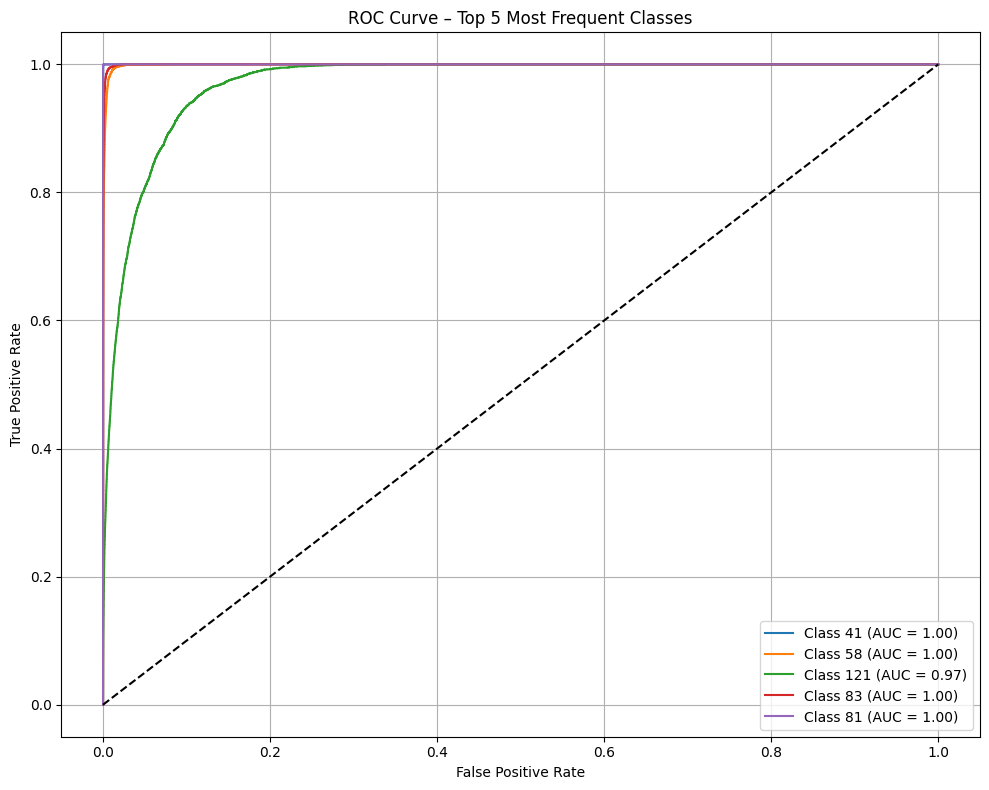

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for cls in top_classes:
    fpr, tpr, _ = roc_curve(y_test_bin[:, cls], y_probs[:, cls])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Top 5 Most Frequent Classes')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

#### Confusion Matrix

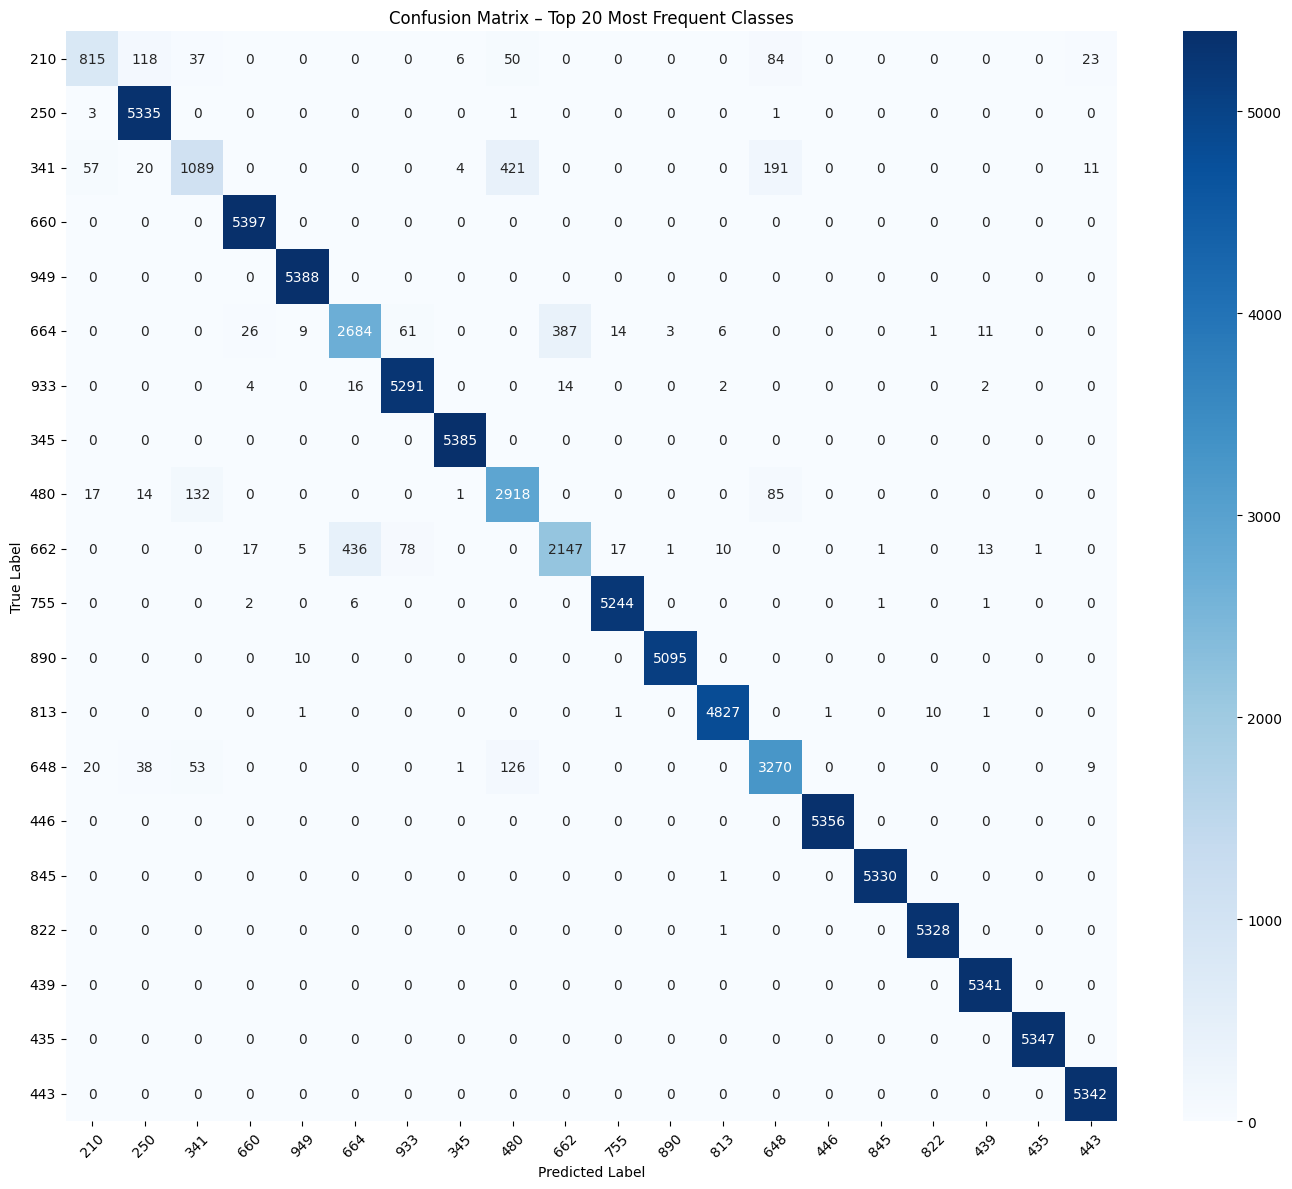

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter
import numpy as np

# 1. Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Get top 20 most frequent classes from y_test
top_20_classes = [cls for cls, _ in Counter(y_test).most_common(20)]

# 3. Filter the confusion matrix
cm_top = cm[np.ix_(top_20_classes, top_20_classes)]

# Optional: get readable labels if you used LabelEncoder
try:
    labels = le_filtered.inverse_transform(top_20_classes)
except:
    labels = top_20_classes  # fallback if le_filtered not defined

# 4. Plot it
plt.figure(figsize=(14, 12))
sns.heatmap(cm_top, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix – Top 20 Most Frequent Classes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Interpretability


# SHAP


In [ ]:
# Load saved model
xgb_model = xgb.XGBClassifier()
xgb_model.load_model("xgb_crime_model.json")

# Load label encoder (for inverse_transform)
import joblib
le_filtered = joblib.load("label_encoder.pkl")

In [ ]:
!pip install shap
import shap
import xgboost as xgb

PermutationExplainer explainer: 11it [01:27,  8.76s/it]
<ipython-input-18-23cb6bce1589>:14: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_shap_safe, max_display=10)
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:1153: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


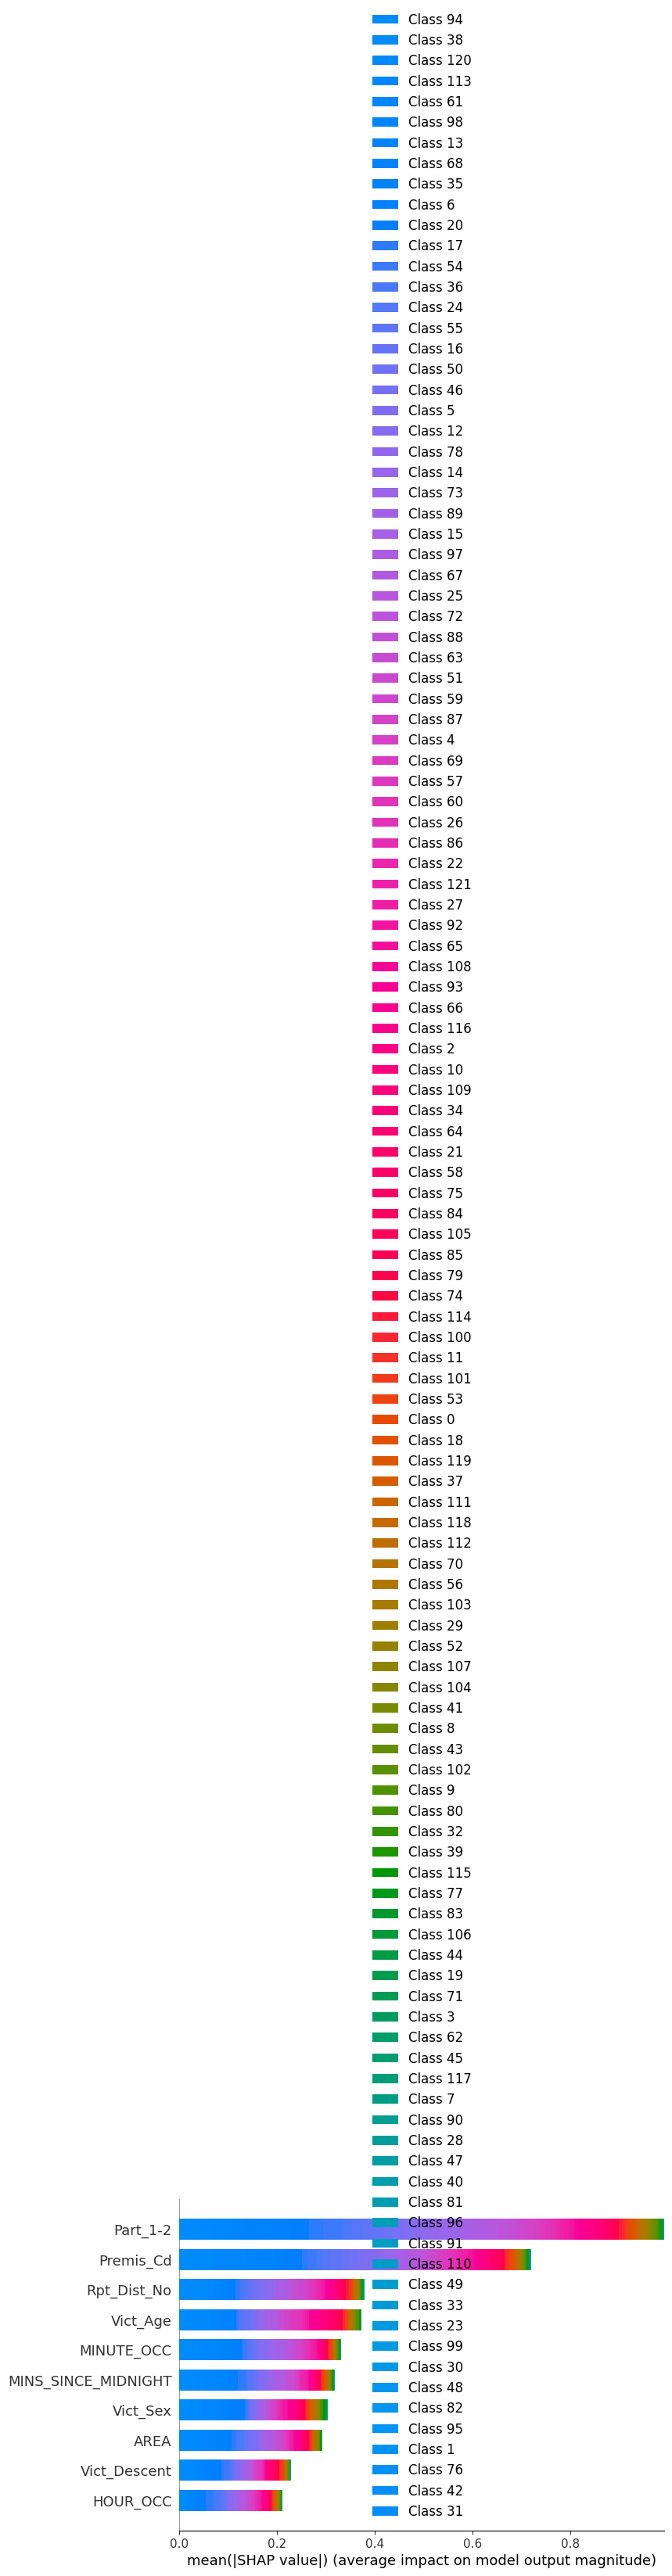

In [ ]:
# Sample just 10 rows to avoid OOM
X_shap_safe = X_test.sample(10, random_state=42)

# Convert to DataFrame to ensure compatibility
X_shap_safe = pd.DataFrame(X_shap_safe, columns=X_test.columns)

# Safe SHAP explainer using exact model output function
explainer = shap.Explainer(xgb_model.predict_proba, X_shap_safe)

# Compute SHAP values
shap_values = explainer(X_shap_safe)

# Plot summary for top features
shap.summary_plot(shap_values, X_shap_safe, max_display=10)

### Original SHAP Summary Plot (Per-Class Breakdown)

This plot displayed the mean absolute SHAP values for every feature **across each class** in a multi-class classification problem. While informative, the high number of classes (over 100) made it visually overwhelming and impractical for interpretation.

- Each color-coded bar represents the impact of a feature on a specific class.
- Feature impact was averaged per class, making it harder to focus on overall feature importance.
- Due to the vertical length, this plot was replaced with a more concise visualization below.

<ipython-input-22-b8a2cc200e2d>:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_agg, X_shap_safe, feature_names=X_shap_safe.columns, max_display=10)


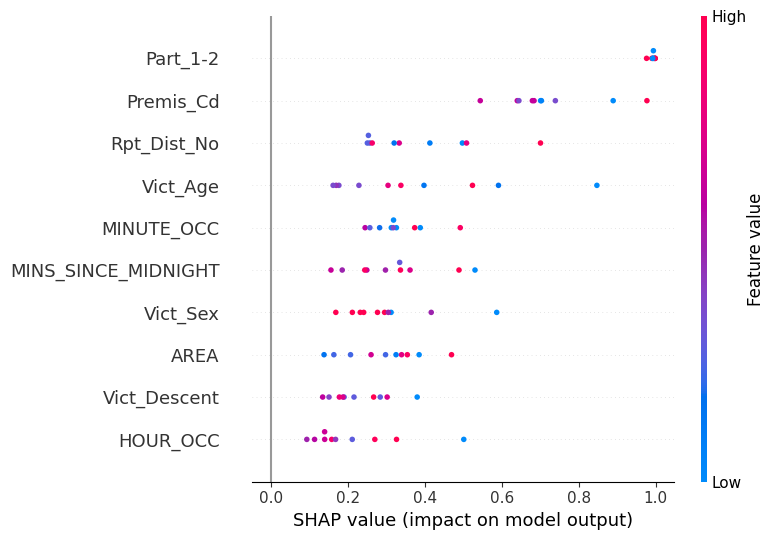

In [ ]:
# Sum the absolute SHAP values across all classes
shap_values_agg = np.abs(shap_values.values).sum(axis=2)  # shape: (samples, features)

# Plot summary of aggregated SHAP values
shap.summary_plot(shap_values_agg, X_shap_safe, feature_names=X_shap_safe.columns, max_display=10)

### Final SHAP Summary Plot (Aggregated Feature Importance)

This SHAP summary plot aggregates the impact of features across all classes, offering a cleaner and more interpretable view of overall model behavior.

- **Top 10 features** with the highest average SHAP values are shown.
- Each dot represents the SHAP value for one feature in a specific prediction.
- The **x-axis** indicates the impact of the feature on the model output.
- The **color gradient** shows the feature value (blue = low, red = high).

This visualization is used to support global interpretability and feature importance analysis.

## Interpretation of SHAP Summary Plot
The SHAP summary plot shows that the most influential features in predicting crime types are Part_1-2, Premis_Cd, and Rpt_Dist_No. These features consistently have the highest average impact on the model’s predictions across all classes.

*Part_1-2*: Represents the severity of the crime (Part I or Part II). Higher values tend to significantly increase the model's confidence in certain classes, making it the most impactful predictor overall.

*Premis_Cd*: Encodes the type of location where the crime occurred.

*Rpt_Dist_No*: Indicates the reporting district, showing that location/geographic patterns play a key role in crime prediction.

Other time-related features like HOUR_OCC, MINUTE_OCC, and MINS_SINCE_MIDNIGHT also contribute, suggesting that the time of occurrence affects the predicted crime category.

The color gradient highlights how feature values (low to high) shift SHAP values positively or negatively. For example, higher crime severity (Part_1-2) often corresponds to higher SHAP values, pushing predictions toward specific crime classes.


In [ ]:
row_index = 0
class_idx = 113  # can be changed this to target a different class

# Get base value and SHAP values for this class
shap_vals_single = shap_values.values[row_index, :, class_idx]
base_value = shap_values.base_values[row_index, class_idx]
X_instance = X_shap_safe.iloc[row_index]

In [ ]:
shap.initjs()
shap.force_plot(base_value, shap_vals_single, X_instance)

###  SHAP Force Plot Interpretation – Class 113

This force plot visualizes how each feature influenced the model’s confidence in predicting **Class 113** for a specific test instance (`row_index = 0`).

We selected **Class 113** because it was the class with the **highest predicted probability** according to LIME, making it the most relevant class to explain.

---

####  Key Model Output:
- **Base value**: 0.03746  
  → This is the model’s average predicted probability for Class 113 across all samples.
- **f(x)**: 0.32  
  → After accounting for this specific instance’s features, the model predicted a **32% probability** of Class 113 — a substantial increase from the base.

---

####  Features that Increased the Probability of Class 113:
These features **pushed the model’s confidence upward** toward predicting Class 113:

- `Status = 3`  
- `OCC_MONTH = 11`  
- `MINUTE_OCC = 12`  
- `Vict_Descent = 8`  
- `OCC_YEAR = 2020`  
- `Vict_Sex = 3`  
- `Part_1-2 = 2` (likely indicates a Part II crime)  
- `Premis_Cd = 130`  

Each of these contributed positively to the final prediction, increasing the probability significantly.

---

####  Feature that Decreased the Probability:
Only one feature slightly pushed against the prediction:

- `Vict_Age = 49`

This feature had a **minor negative influence** on the model's decision.

---

####  Conclusion:
This force plot illustrates that the model was initially uncertain about Class 113, with a base probability of ~3.7%. However, several features — particularly `Status`, `Premis_Cd`, and `Part_1-2` — increased the confidence to 32%, supporting the model’s prediction. This aligns with LIME’s selection of Class 113 as the most probable label for this instance.


### SHAP Force Plot Interpretation (Single Prediction)
This force plot explains the model’s prediction for a single test instance, showing how each feature pushes the prediction toward or away from a certain class probability.

*What it shows:*
The baseline value (expected model output before seeing any features) is 0.001187.

The final model output (f(x)) for this class is 0.00, meaning the model ultimately gave very low confidence that this instance belongs to the target class.

The red features (on the left) are pushing the prediction lower, decreasing the likelihood of this class.

The blue features (on the right) are pushing the prediction higher, increasing the probability.

Negative Contributors (push prediction ↓):
MINS_SINCE_MIDNIGHT = 1,212: Indicates the crime occurred in the afternoon, which lowers confidence in this class.

OCC_MONTH = 11: Crimes in November decrease the likelihood of this class.

Vict_Sex = 3: Possibly represents a specific sex code (e.g., female or unknown) that pushes the prediction downward.

MINUTE_OCC = 12: The minute of occurrence has a slight negative contribution.

Positive Contributors (push prediction ↑):
Part_1-2 = 2: Indicates a Part II crime, which supports this class.

HOUR_OCC = 20: Evening time increases likelihood.

AREA = 7: Certain police district positively associated.

Vict_Age = 49, Vict_Descent = 8, Rpt_Dist_No = 792, Premis_Cd = 130: These attributes increase the model’s confidence — but not enough to overcome the negative contributions.

# LIME

In [ ]:
!pip install lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ca5bf201a812cedbb6e78b2f3bcbb49268a12e2c389787f319dd1ba335fcc10d
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


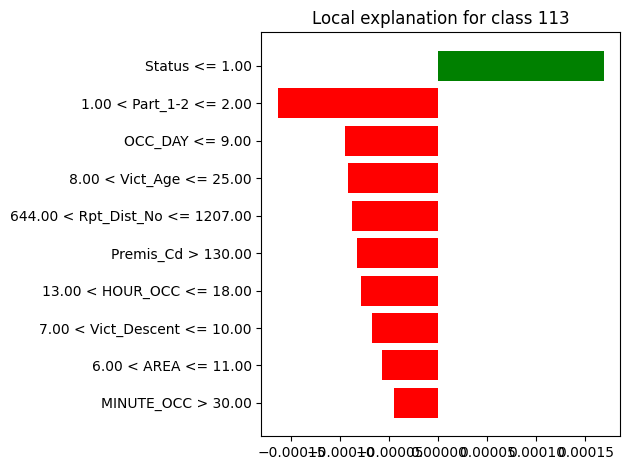

In [ ]:
# Use fewer rows to initialize LIME faster
X_array = X_train.values
feature_names = X_train.columns.tolist()
class_names = [str(cls) for cls in le_filtered.classes_]

# Initialize LIME explainer
explainer_lime = LimeTabularExplainer(
    training_data=X_array,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification',
    discretize_continuous=True  # default True, but good to be explicit
)

# Pick a specific test sample
i = 0
sample = X_test.iloc[i].values

# Get explanation (ensure predict_fn returns probabilities)
exp = explainer_lime.explain_instance(
    data_row=sample,
    predict_fn=xgb_model.predict_proba,
    num_features=10
)

# Plot safely
fig = exp.as_pyplot_figure()
plt.tight_layout()
plt.show()

In [ ]:
# If you prefer text explanation instead of plot:
for feature, weight in exp.as_list():
    print(f"{feature}: {weight:.4f}")

Status <= 1.00: 0.0002
1.00 < Part_1-2 <= 2.00: -0.0002
OCC_DAY <= 9.00: -0.0001
8.00 < Vict_Age <= 25.00: -0.0001
644.00 < Rpt_Dist_No <= 1207.00: -0.0001
Premis_Cd > 130.00: -0.0001
13.00 < HOUR_OCC <= 18.00: -0.0001
7.00 < Vict_Descent <= 10.00: -0.0001
6.00 < AREA <= 11.00: -0.0001
MINUTE_OCC > 30.00: -0.0000


###  LIME Local Explanation – Class 113

This LIME plot explains how specific features influenced the model's prediction that the selected test instance belongs to **Class 113**. LIME builds a local  model around the instance to approximate the behavior of the actual classifier.

We chose Class 113 because it had the **highest predicted probability** for this instance.

---

####  Feature Contributions:

- **Positive Contributor (Increased prediction for Class 113):**
  - `Status <= 1.00`: **+0.0002**  
    This was the **only feature** that increased the model's probability for Class 113.

- **Negative Contributors (Decreased prediction for Class 113):**
  - `1.00 < Part_1-2 <= 2.00`: **–0.0002**
  - `OCC_DAY <= 9.00`: **–0.0001**
  - `8.00 < Vict_Age <= 25.00`: **–0.0001**
  - `644.00 < Rpt_Dist_No <= 1207.00`: **–0.0001**
  - `Premis_Cd > 130.00`: **–0.0001**
  - `13.00 < HOUR_OCC <= 18.00`: **–0.0001**
  - `7.00 < Vict_Descent <= 10.00`: **–0.0001**
  - `6.00 < AREA <= 11.00`: **–0.0001**
  - `MINUTE_OCC > 30.00`: **–0.0000**

---

####  Interpretation:

LIME indicates that **most features pushed against** the prediction of Class 113, with `Part_1-2`, time-related features (`HOUR_OCC`, `MINUTE_OCC`), and location codes contributing negative weights. However, the condition `Status <= 1.00` **slightly increased** the model's confidence in this class.

The net effect is a modestly **suppressed prediction** for Class 113, which aligns with the SHAP force plot showing that this instance had conflicting contributions but ultimately resulted in a mid-confidence prediction.

---

####  Why Use LIME:
LIME helps validate and visualize **how individual feature values affect one prediction** using a locally linear model. It is especially useful for **interpreting tabular data** with categorical and numeric splits.


In [ ]:
true_crime_code = le.inverse_transform([113])[0]
print("Class 113 corresponds to crime code:", true_crime_code)

Class 113 corresponds to crime code: 910


Crime Code 910 is Kidnapping